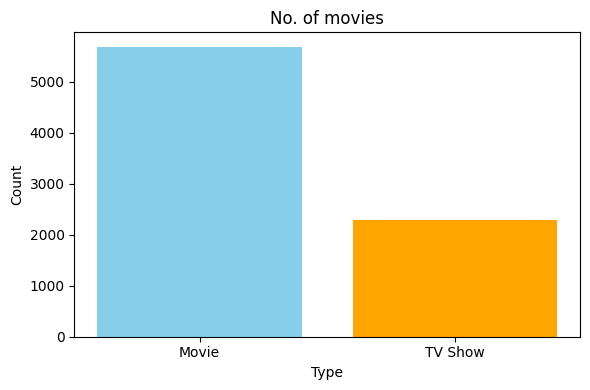

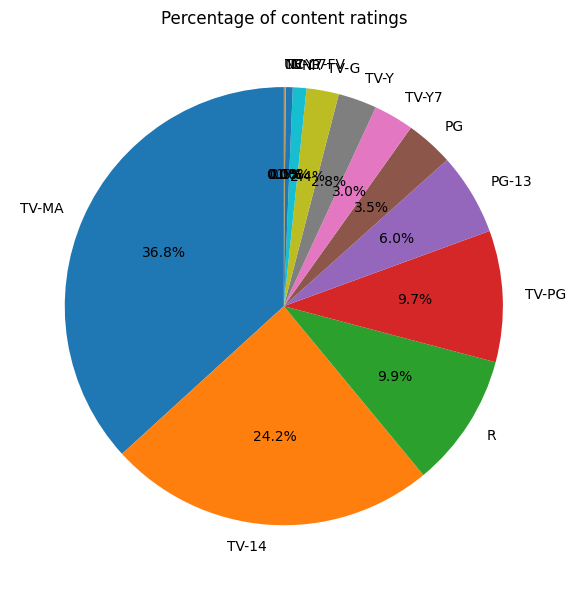

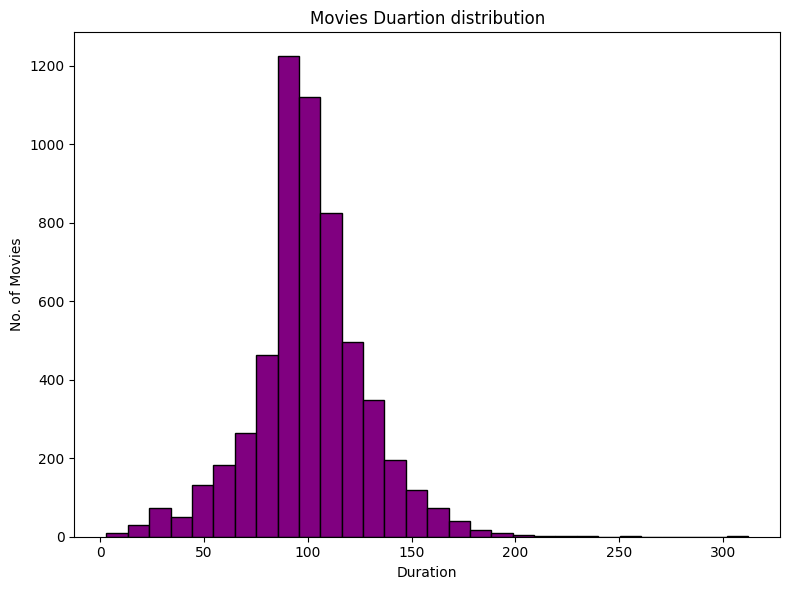

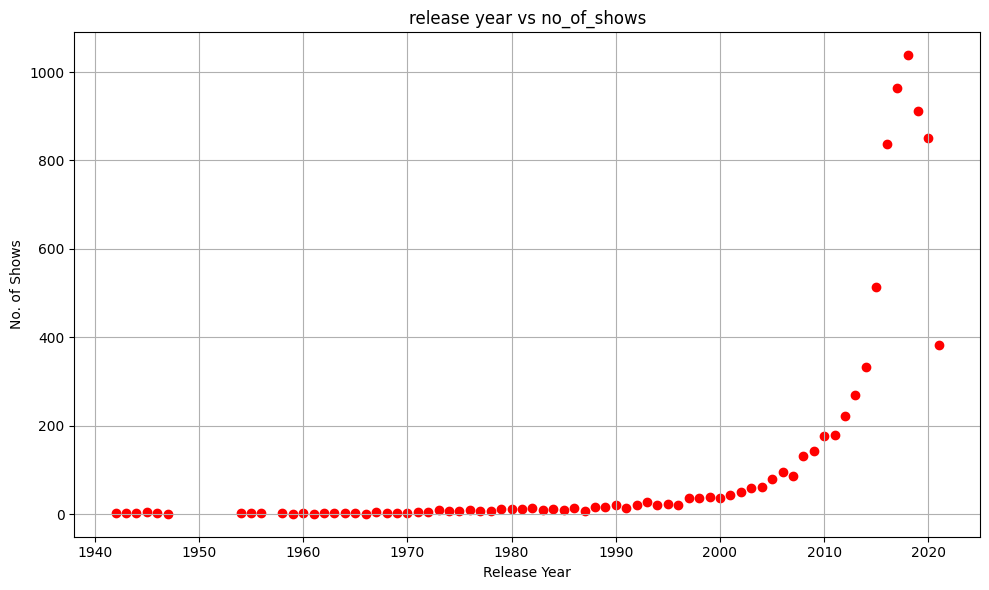

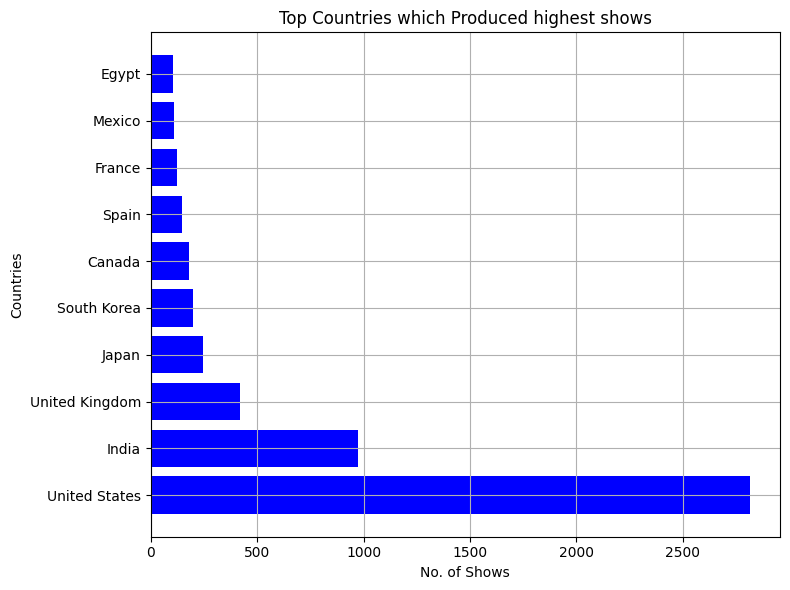

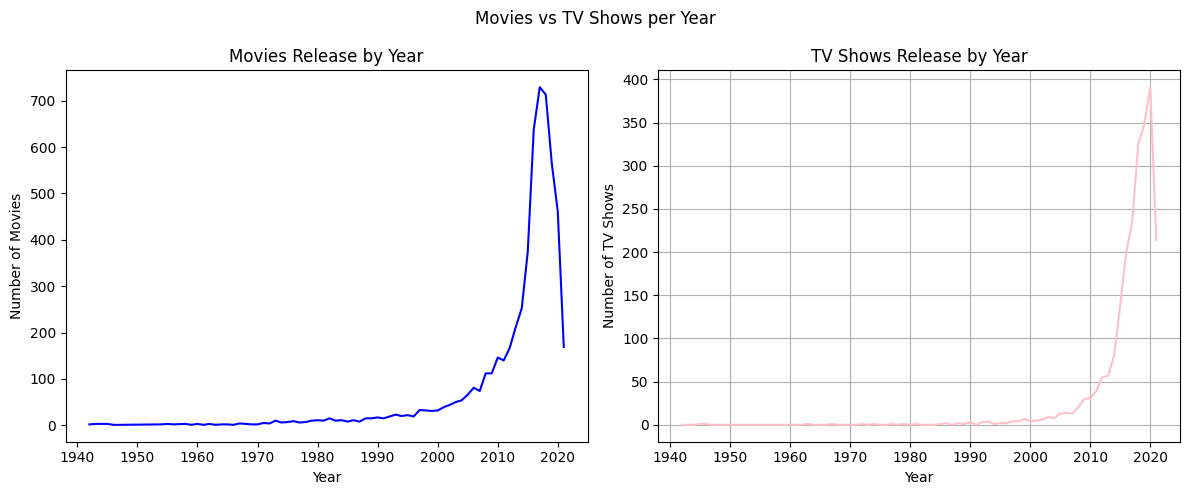

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#loading the data
df=pd.read_csv('Desktop/netflix_titles.csv')
#print(df.head())


#cleaning the data

df=df.dropna(subset=['type','release_year','rating','country','duration'])

#movies_vs_tvshows 
type_counts=df['type'].value_counts()

plt.figure(figsize=(6,4))

plt.bar(type_counts.index, type_counts.values, color=['skyblue','orange'])

plt.title("No. of movies")
plt.xlabel('Type')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('Movies_vs_Tv shows.png')
plt.show()

#percentage of content rating 
rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(rating_counts, labels=rating_counts.index,autopct='%1.1f%%',startangle=90)


plt.title("Percentage of content ratings")
plt.tight_layout()
plt.savefig('content_rate_pie.png')
plt.show()

#movies vs duartion graph 
movie_df= df[df['type']=='Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '').str.strip().astype(int)


plt.figure(figsize=(8,6))

plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title("Movies Duartion distribution")
plt.xlabel('Duration')
plt.ylabel('No. of Movies')
plt.tight_layout()
plt.savefig('DUARTION_x_MOVIEShistogram.png')
plt.show()


#scatter plot for release year vs no_of_shows

release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color='red')
plt.title("release year vs no_of_shows")
plt.xlabel('Release Year')
plt.ylabel('No. of Shows')
plt.tight_layout()
plt.grid(True)
plt.savefig('release year vs no_of_shows.png')
plt.show()


#top 10 countries count based on shows

country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='Blue')
plt.title("Top Countries which Produced highest shows")
plt.ylabel('Countries')
plt.xlabel('No. of Shows')
plt.tight_layout()
plt.grid(True)
plt.savefig('countries count based on shows hbar.png')
plt.show()


#subplot movies-vs tv shows per year

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Create 2 subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Release by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# Second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='pink')  # Make sure spelling matches your DataFrame
ax[1].set_title('TV Shows Release by Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Movies vs TV Shows per Year')
plt.tight_layout()
plt.savefig('movies_vs_tv_shows_subplot.png')
plt.grid(True)
plt.show()